## Clusterization with NLP lab

>1. Fetch the articles from cnn.com using beautiful soup library `bt4`.
2. Prepare `TF-IDF` for the 100 articles.
3. implement `K-means` clusterization.
>

In [ ]:
from bs4 import BeautifulSoup

import requests



# Base URL

BASE_URL = 'http://lite.cnn.com'



# Send a request to the main page

response = requests.get(BASE_URL)

response.encoding = 'utf-8'  # CNN Lite uses simple HTML



# Parse the page

soup = BeautifulSoup(response.text, 'html.parser')



# Get article links (they are in <a> tags with href starting with /)

article_links = [a['href'] for a in soup.find_all('a', href=True) if a['href'].startswith('/')]



# Prepare list to store articles

articles_text = []



# Download article content

for i, link in enumerate(article_links[:100]):  # Limit to 100 articles

    try:

        article_url = BASE_URL + link

        article_resp = requests.get(article_url)

        article_soup = BeautifulSoup(article_resp.text, 'html.parser')

        # Extract all text in <p> tags

        paragraphs = article_soup.find_all('p')

        text = '\n'.join(p.get_text() for p in paragraphs)

        articles_text.append(text)

        print(f"Downloaded article {i+1}: {article_url}")

    except Exception as e:

        print(f"Error with article {i+1}: {e}")



# Example output

print("\nSample article content:\n")

print(articles_text[0] if articles_text else "No articles retrieved.")



Downloaded article 1: http://lite.cnn.com/
Downloaded article 2: http://lite.cnn.com/2025/06/05/politics/new-jersey-governor-donald-trump
Downloaded article 3: http://lite.cnn.com/2025/06/05/world/us-trump-travel-ban-countries-explainer-intl
Downloaded article 4: http://lite.cnn.com/2025/06/05/entertainment/leah-remini-jennifer-lopez-friendship
Downloaded article 5: http://lite.cnn.com/2025/06/04/politics/trump-travel-ban-proclamation
Downloaded article 6: http://lite.cnn.com/2025/06/04/world/meghan-sussex-lilibet-photo-scli-intl
Downloaded article 7: http://lite.cnn.com/2025/06/05/business/trump-china-economy-tariffs-trade-war
Downloaded article 8: http://lite.cnn.com/2025/06/05/politics/supreme-court-reverse-discrimination-suits
Downloaded article 9: http://lite.cnn.com/2025/06/05/politics/supreme-court-backs-catholic-charities-push-to-object-to-state-taxes-on-religious-grounds
Downloaded article 10: http://lite.cnn.com/2025/06/05/business/michaels-acquires-joann-ip-private-labels
Do

In [ ]:
articles_text[1]

'\n  By Arlette Saenz, CNN\n\n\nUpdated: \n        11:15 AM EDT, Thu June 5, 2025\n    \n\n  Source: CNN\n\n\n  The high-profile battles to become the Democratic and Republican nominees for governor of New Jersey are centered on a single summer Garden State resident: President Donald Trump.\n\n\n  While Democrats have debated their approaches to housing, affordability and immigration, they all agree that part of the role of the state’s next governor is to serve as a check on Trump. On the Republican side, Trump has endorsed a one-time critic who came close to winning the governor’s race four years ago.\n\n\n  New Jersey is one of two states featuring a governor’s race this year, offering a gauge of voter sentiment about both Trump and the Democratic Party ahead of the 2026 midterms. While Virginia voters will also select a governor this year, New Jersey is the only election featuring contested primaries that have already turned the gubernatorial race into the most expensive in state hi

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tftext = TfidfVectorizer(stop_words='english')

In [ ]:
 vectors = tftext.fit_transform(articles_text);

In [ ]:
vectors.shape

(100, 9285)

In [ ]:
# prompt: import pca
import numpy as np
from sklearn.decomposition import PCA
new_vect = PCA(n_components=2).fit_transform(vectors.toarray())

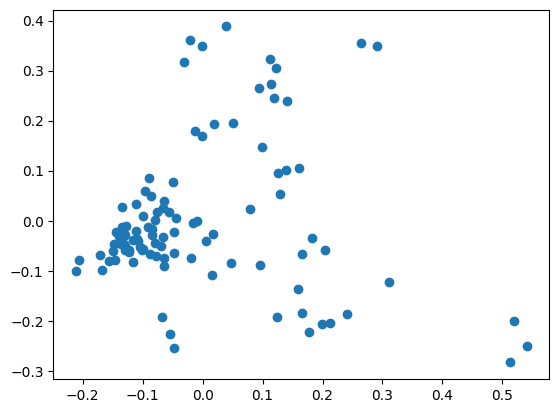

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(new_vect[:,0],new_vect[:,1]);

In [ ]:
clusts = 4
centers = np.random.uniform(-0.3 ,0.5,  size=(clusts,2))

In [ ]:
centers

array([[ 0.38563586, -0.21784681],
       [ 0.10237422,  0.11945196],
       [-0.09808797, -0.22074674],
       [ 0.19257936, -0.28680288]])

In [ ]:
new_vect.shape

(100, 2)

In [ ]:
# prompt: implement distance checking function

def calculate_distance(v1, v2):
  """
  Calculates the Euclidean distance between two vectors.

  Args:
    v1: The first vector (NumPy array).
    v2: The second vector (NumPy array).

  Returns:
    The Euclidean distance between the two vectors.
  """
  return np.linalg.norm(v1 - v2)


In [ ]:
distances = np.array([[calculate_distance(v,centers[c]) for c in range(4)] for v in new_vect])

In [ ]:
distances[:5]

array([[0.56532513, 0.2857754 , 0.20294913, 0.42835934],
       [0.27302133, 0.17434292, 0.3363616 , 0.25164983],
       [0.406385  , 0.03417399, 0.38723082, 0.38746641],
       [0.54895412, 0.29015854, 0.17852102, 0.40706635],
       [0.40249836, 0.04141661, 0.39917606, 0.39079448]])

In [ ]:
p_labels = np.argmin(distances, axis=1)

In [ ]:
new_centers = [ np.mean(new_vect[p_labels==c], axis = 0) for c in range(4) ]

In [ ]:
new_centers

[array([ 0.47071752, -0.21428568]),
 array([0.04201095, 0.12211743]),
 array([-0.10481735, -0.06256781]),
 array([ 0.18272654, -0.19015749])]

In [ ]:
isStatic =  np.allclose(new_centers, centers)

In [ ]:
sum(p_labels == 0)

np.int64(71)

In [ ]:
isStatic

False

In [ ]:
def k_means(vectors, clusts, max_iterations):
  centers = np.random.uniform(-0.3 ,0.5,  size=(clusts,vectors.shape[1]))
  isStatic = False
  for i in range(max_iterations):

    distance = np.array([[calculate_distance(v,centers[c]) for c in range(clusts)] for v in vectors])
    p_labels = np.argmin(distances, axis=1)
    new_centers = [ np.mean(vectors[p_labels==c], axis = 0) for c in range(clusts) ]
    isStatic =  np.allclose(new_centers, centers)
    # if isStatic:
    #   break
    centers = new_centers
  print("iterations are: ", i)
  return new_centers, p_labels


In [ ]:
k_means(vectors, 4, 20)

iterations are:  19


([matrix([[0.        , 0.01262663, 0.        , ..., 0.        , 0.        ,
           0.        ]]),
  matrix([[0.00270882, 0.00602197, 0.0011107 , ..., 0.        , 0.00138273,
           0.        ]]),
  matrix([[0.00086756, 0.00711879, 0.        , ..., 0.0006397 , 0.        ,
           0.        ]]),
  matrix([[0.        , 0.04678812, 0.00310595, ..., 0.        , 0.        ,
           0.00833747]])],
 array([2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 3, 2, 1,
        2, 3, 2, 1, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
        1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1]))

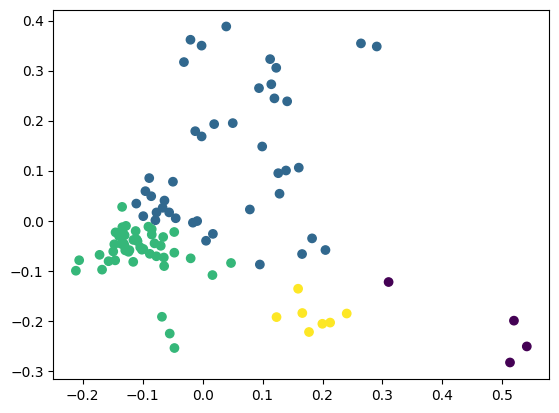

In [ ]:
plt.scatter(new_vect[:,0],new_vect[:,1], c=p_labels);

In [ ]:
articles_text[p_labels==0]

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# prompt: print the articels text belonging to the cluster zero

print("\nArticles in Cluster 0:\n")

for i, text in enumerate(articles_text):

  if p_labels[i] == 3:
    print(f"Article {i+1}:\n{text[:400]}\n---\n")
    print("=====================================================================\n")


Articles in Cluster 0:

Article 20:

  By Alicia Wallace, CNN


Updated: 
        9:31 AM EDT, Thu June 5, 2025
    

  Source: CNN


  Last June, after almost a full year on the job hunt, Jordan Williams landed a role at a high-growth, United Kingdom-based outdoor apparel brand that was looking to build out its US operations.


  Passenger Clothing was well positioned for expansion: The company landed orders with REI, Scheels and o
---


Article 24:

  By Anna Cooban, CNN


Updated: 
        9:06 AM EDT, Thu June 5, 2025
    

  Source: CNN


  The European Central Bank on Thursday cut its main interest rate again, citing slowing price rises.


  The widely anticipated move takes the ECB’s main rate to 2%, from 2.25% previously, and marks the eighth time the central bank has slashed borrowing costs since last June as inflation has tumbled fro
---


Article 27:

  By Reuters


Updated: 
        8:52 AM EDT, Thu June 5, 2025
    

  Procter & Gamble will cut 7,000 jobs, or about 6% of 